In [8]:
#importing Required libraries
import pandas as pd
import numpy as p
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib Inline

In [9]:
#Importing Data
data = pd.read_csv("student_scores - student_scores.csv")

In [6]:
#First Five records
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
#total number of row and coloum
data.shape

(25, 2)

In [8]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [10]:
#no null values in Dataset
data.isnull().any()

Hours     False
Scores    False
dtype: bool

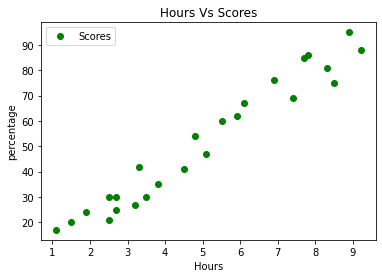

In [17]:
data.plot(x="Hours", y="Scores",color='g',style= 'o')

plt.title("Hours Vs Scores")
plt.xlabel("Hours")
plt.ylabel("percentage")
plt.show()

<AxesSubplot:xlabel='Hours'>

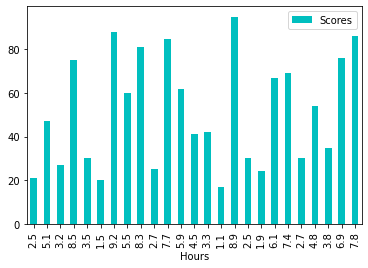

In [10]:
data.plot.bar(x="Hours", y="Scores", color='c',style= 'o')

<AxesSubplot:xlabel='Hours'>

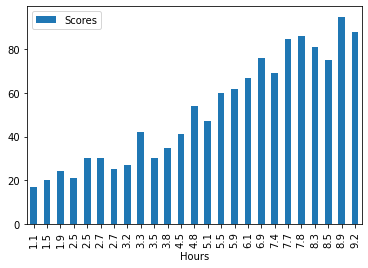

In [11]:
data.sort_values(["Hours"],axis=0, ascending=[True],inplace=True)
data.plot.bar(x="Hours", y ="Scores")

Observations from above graphs-

As study hours increases scores also increases

In [13]:
#dividing the data
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

In [3]:
from sklearn.model_selection import train_test_split

In [14]:
#spliting thee data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
#algorithm
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

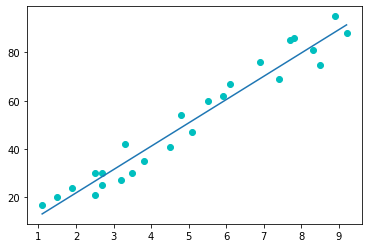

In [16]:
#regression line
line = regressor.coef_*x+regressor.intercept_

#Plotting for the test
plt.scatter(X, y,color="c")
plt.plot(X, line);
plt.show()

# Ready for Testing

In [18]:
print("ORIGINAL SCORES")
print(y_test)
print("PREDICTED SCORES")
y_pred = regressor.predict(X_test)
print(y_pred)

ORIGINAL SCORES
[30 24 85 67 41]
PREDICTED SCORES
[28.6177145  20.88803334 76.92822173 61.46885942 46.0094971 ]


In [19]:
datanew = pd.DataFrame({"Actual":y_test, "Predicted":y_pred})
datanew

,Actual,Predicted
0,30,28.617714
1,24,20.888033
2,85,76.928222
3,67,61.468859
4,41,46.009497


What will be the predicted score if a student studies for 9.25 hrs/day?

In [20]:
hours = [[9.25]]
prediction = regressor.predict(hours)

print(prediction)

[91.90447898]


so the predicted score for 9.25 hours of study per day is 91.9

In [37]:
from sklearn import metrics
print('Mean absolute error = ',metrics.mean_absolute_error(y_test,  y_pred))

Mean absolute error =  4.183859899002975


In [38]:
#checking the model

from sklearn.metrics import r2_score
print("R2 Score = ", r2_score(y_test, y_pred))

R2 Score =  0.9454906892105356
